<a href="https://colab.research.google.com/github/baumannf/bina_module/blob/main/BINA_LN1_CybercrimeVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datenanalyse & Visualisierung der Cyberkriminalität im DACH - Raum mit Fokus Sensibilisierung der schweizer Bevölkerung

In diesem Jupyter Notebook werden die zuvor aufbereiteten Datensätze ausgewertet und entsprechend visualisiert.

## Import der Daten

In diesem Schritt werden die 'aufbereiteten' csv-Files aus dem Jupyter Notebook 'BINA_LN1_CybercrimeAnalytics.ipynb' importiert. Diese Datenquellen werden dann ausgewertet, analysiert und entsprechend visualisiert.

### Import Masterdaten 'Cyberdelikte - DACH'

In diesem Abschnitt werden die folgenden Masterfiles für die weitere Verwendung im Rahmen der Projektarbeit importiert aus dem [GitHub Repository](https://github.com/baumannf/bina_module):

- 'Cyberdelikt - DACH'
- 'Cyberdelikte - DCH - Täter'
- 'Cyberdelikte - DCH - Opfer'
- 'Sicherheit Internet - CH'

In [14]:
# Define variables for the master file paths
data_cyber_dach = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data_cyber_dch_taeter = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DCH_Taeter.csv'
data_cyber_ch_opfer = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_CH_Opfer.csv'
data_internetsec_ch = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Sicherheit-Internet_CH.csv'

In [15]:
import pandas as pd

# Data import cybercrime dach
master_cyber_dach = pd.read_csv(data_cyber_dach, sep=',')
master_cyber_dach.head()

,land,jahr,cyber_kat,taten,aufg_taten,aufg_quote
0,ch,2020,Computerbetrug,18171,7104,39.095262
1,ch,2020,Computersabotage,1072,158,14.738806
2,ch,2020,Datendiebstahl,1447,209,14.443677
3,ch,2020,Datenfälschung/-täuschung,1240,913,73.629032
4,ch,2021,Computerbetrug,22962,7689,33.485759


In [16]:
# Data import cybercrime dch offender
master_cyber_dch_taeter = pd.read_csv(data_cyber_dch_taeter, sep=',')
master_cyber_dch_taeter.head()

,land,jahr,cyber_kat,<10,10-17,18-24,25-29,30-39,40-49,50-59,>60,mann,frau
0,ch,2020,Computerbetrug,0.0,120.0,563.0,354.0,594.0,480.0,325.0,222.0,1769.0,929.0
1,ch,2020,Computersabotage,0.0,6.0,17.0,15.0,27.0,19.0,15.0,8.0,81.0,26.0
2,ch,2020,Datendiebstahl,0.0,29.0,34.0,15.0,31.0,28.0,10.0,6.0,124.0,32.0
3,ch,2020,Datenfälschung/-täuschung,0.0,134.0,70.0,76.0,152.0,133.0,81.0,58.0,468.0,239.0
4,ch,2021,Computerbetrug,0.0,204.0,586.0,404.0,746.0,496.0,417.0,315.0,2137.0,1056.0


In [17]:
# Data import cybercrime ch victims
master_cyber_ch_opfer = pd.read_csv(data_cyber_ch_opfer, sep=',')
master_cyber_ch_opfer.head()

,jahr,delikt,taten,aufg_taten,15-29,30-59,>60,mann,frau
0,2020,Phishing,642,60,64.0,238.0,93.0,218.0,179.0
1,2020,Hacking: Gewaltsames Eindringen in ein Datenve...,319,46,35.0,71.0,27.0,61.0,73.0
2,2020,Hacking: Eindringen in ein Datenverarbeitungss...,470,101,75.0,132.0,34.0,125.0,119.0
3,2020,Malware – Ransomware,222,4,1.0,11.0,7.0,17.0,2.0
4,2020,Malware – E-Banking Trojaner,83,19,6.0,19.0,19.0,27.0,17.0


In [18]:
# Data import internet security ch
master_internetsec_ch = pd.read_csv(data_internetsec_ch, sep=',')
master_internetsec_ch.head()

,kategorie,alter,bildung,sex,2023,2021,2019
0,Verwendung von Sicherheitssoftware (Computer),15-29,sekundarstufe_2,M,59572.0,76047.0,62168.0
1,Verwendung von Sicherheitssoftware (Computer),15-29,tertiaerstufe,M,92802.0,78683.0,72913.0
2,Verwendung von Sicherheitssoftware (Computer),15-29,oblig_schulbild_<25,M,230380.0,276876.0,290256.0
3,Verwendung von Sicherheitssoftware (Computer),30-59,ohne_nachoblig_schulbild_>25,M,65591.0,92791.0,146203.0
4,Verwendung von Sicherheitssoftware (Computer),30-59,sekundarstufe_2,M,343394.0,345599.0,447555.0


### Index setzen Data Frames
Aufgrund des Importes der Master Files müssen die Zusammengesetzten Indexe der Files wiederhergestellt resp. neu gesetzt werden.

In [19]:
# Reset the index of the dataframe 'master_cyber_dach'
master_cyber_dach = master_cyber_dach.reset_index()
master_cyber_dach = master_cyber_dach.set_index(['land','jahr','cyber_kat'])
master_cyber_dach

index   taten  aufg_taten  aufg_quote
land jahr cyber_kat                                                       
ch   2020 Computerbetrug                 0   18171        7104   39.095262
          Computersabotage               1    1072         158   14.738806
          Datendiebstahl                 2    1447         209   14.443677
          Datenfälschung/-täuschung      3    1240         913   73.629032
     2021 Computerbetrug                 4   22962        7689   33.485759
          Computersabotage               5    1362         112    8.223201
          Datendiebstahl                 6    2540         261   10.275591
          Datenfälschung/-täuschung      7    1103         719   65.185857
     2022 Computerbetrug                 8   24407        7952   32.580817
          Computersabotage               9    1382         141   10.202605
          Datendiebstahl                10    3974         245    6.165073
          Datenfälschung/-täuschung     11     847         533   62.927981
     2023 Computerbetrug                12   33585        7089   21.107637
          Computersabotage              13    1372          94    6.851312
          Datendiebstahl                14    5680         290    5.105634
          Datenfälschung/-täuschung     15     725         430   59.310345
de   2020 Datenfälschung/-täuschung     16   10895        3827   35.126205
          Computersabotage              17    3770         891   23.633952
          Datendiebstahl                18   10763        2639   24.519186
          Computerbetrug                19  105049       34453   32.797076
     2021 Datenfälschung/-täuschung     20   13390        4365   32.598954
          Computersabotage              21    5053         967   19.137146
          Datendiebstahl                22   14918        2765   18.534656
          Computerbetrug                23  113002       34842   30.833083
     2022 Datenfälschung/-täuschung     24   13043        4428   33.949245
          Computersabotage              25    3451         897   25.992466
          Datendiebstahl                26   13206        2707   20.498258
          Computerbetrug                27  107165       31293   29.200765
at   2020 Computerbetrug                28   10957        1789   16.327462
          Computersabotage              29    1248         201   16.105769
          Datendiebstahl                30      79          17   21.518987
          Datenfälschung/-täuschung     31     630         452   71.746032
     2021 Computerbetrug                32   13241        2228   16.826524
          Computersabotage              33    1401         241   17.201999
          Datendiebstahl                34      72          15   20.833333
          Datenfälschung/-täuschung     35     770         411   53.376623
     2022 Computerbetrug                36   18966        3779   19.925129
          Computersabotage              37    2280         246   10.789474
          Datendiebstahl                38      76          26   34.210526
          Datenfälschung/-täuschung     39    1054         672   63.757116

In [20]:
# Reset the index of the dataframe 'master_cyber_dch_taeter'
master_cyber_dch_taeter = master_cyber_dch_taeter.reset_index()
master_cyber_dch_taeter = master_cyber_dch_taeter.set_index(['land','jahr','cyber_kat'])
master_cyber_dch_taeter

index   <10   10-17   18-24   25-29  \
land jahr cyber_kat                                                        
ch   2020 Computerbetrug                 0   0.0   120.0   563.0   354.0   
          Computersabotage               1   0.0     6.0    17.0    15.0   
          Datendiebstahl                 2   0.0    29.0    34.0    15.0   
          Datenfälschung/-täuschung      3   0.0   134.0    70.0    76.0   
     2021 Computerbetrug                 4   0.0   204.0   586.0   404.0   
          Computersabotage               5   0.0     5.0     7.0     9.0   
          Datendiebstahl                 6   0.0    36.0    32.0    18.0   
          Datenfälschung/-täuschung      7   0.0    66.0    63.0    65.0   
     2022 Computerbetrug                 8   0.0   233.0   672.0   429.0   
          Computersabotage               9   0.0    11.0    20.0    19.0   
          Datendiebstahl                10   0.0    23.0    38.0    23.0   
          Datenfälschung/-täuschung     11   0.0    67.0    43.0    32.0   
     2023 Computerbetrug                12   3.0   229.0   761.0   474.0   
          Computersabotage              13   0.0     9.0     8.0     9.0   
          Datendiebstahl                14   0.0    38.0    72.0    20.0   
          Datenfälschung/-täuschung     15   1.0    59.0    25.0    36.0   
de   2020 Datenfälschung/-täuschung     16   1.0   170.0   611.0   539.0   
          Computersabotage              17   0.0   139.0   201.0   102.0   
          Datendiebstahl                18   1.0   215.0   487.0   375.0   
          Computerbetrug                19   5.0  1153.0  4631.0  3653.0   
     2021 Datenfälschung/-täuschung     20   0.0   201.0   729.0   627.0   
          Computersabotage              21   3.0   125.0   199.0   131.0   
          Datendiebstahl                22   1.0   239.0   588.0   387.0   
          Computerbetrug                23   8.0  1224.0  4643.0  3685.0   
     2022 Datenfälschung/-täuschung     24   1.0   226.0   713.0   524.0   
          Computersabotage              25   3.0   105.0   161.0    79.0   
          Datendiebstahl                26   2.0   178.0   502.0   322.0   
          Computerbetrug                27  10.0  1227.0  4392.0  3153.0   

                                      30-39   40-49   50-59     >60     mann  \
land jahr cyber_kat                                                            
ch   2020 Computerbetrug              594.0   480.0   325.0   222.0   1769.0   
          Computersabotage             27.0    19.0    15.0     8.0     81.0   
          Datendiebstahl               31.0    28.0    10.0     6.0    124.0   
          Datenfälschung/-täuschung   152.0   133.0    81.0    58.0    468.0   
     2021 Computerbetrug              746.0   496.0   417.0   315.0   2137.0   
          Computersabotage             24.0    15.0    13.0     5.0     55.0   
          Datendiebstahl               24.0    26.0    22.0     5.0    133.0   
          Datenfälschung/-täuschung   118.0   113.0    87.0    57.0    370.0   
     2022 Computerbetrug              735.0   535.0   441.0   350.0   2257.0   
          Computersabotage             13.0    15.0    14.0     4.0     79.0   
          Datendiebstahl               37.0    14.0    16.0     7.0    124.0   
          Datenfälschung/-täuschung    94.0    76.0    56.0    31.0    256.0   
     2023 Computerbetrug              839.0   604.0   480.0   397.0   2490.0   
          Computersabotage             31.0    13.0    10.0     4.0     62.0   
          Datendiebstahl               47.0    22.0    14.0     4.0    180.0   
          Datenfälschung/-täuschung    88.0    62.0    47.0    37.0    227.0   
de   2020 Datenfälschung/-täuschung   855.0   589.0   416.0   173.0   2470.0   
          Computersabotage            225.0   141.0    87.0    29.0    708.0   
          Datendiebstahl              683.0   406.0   260.0    95.0   1804.0   
          Computerbetrug             6270.0  3520.0  2229.0  1069.0  15189.0

In [21]:
# Reset the index of the dataframe 'master_cyber_dch_taeter'
master_cyber_ch_opfer = master_cyber_ch_opfer.reset_index()
master_cyber_ch_opfer = master_cyber_ch_opfer.set_index(['jahr','delikt'])
master_cyber_ch_opfer

index  taten  \
jahr delikt                                                             
2020 Phishing                                                0    642   
     Hacking: Gewaltsames Eindringen in ein Datenver...      1    319   
     Hacking: Eindringen in ein Datenverarbeitungssy...      2    470   
     Malware – Ransomware                                    3    222   
     Malware – E-Banking Trojaner                            4     83   
...                                                        ...    ...   
2023 Sextortion (sex)                                       75    108   
     Live Streaming                                         76     26   
     Cybersquatting                                         77     53   
     Cyber-Rufschädigung (Geschäftlich)                     78     58   
     Cyberbullying/Cybermobbing                             79    614   

                                                         aufg_taten  15-29  \
jahr delikt                                                                  
2020 Phishing                                                    60   64.0   
     Hacking: Gewaltsames Eindringen in ein Datenver...          46   35.0   
     Hacking: Eindringen in ein Datenverarbeitungssy...         101   75.0   
     Malware – Ransomware                                         4    1.0   
     Malware – E-Banking Trojaner                                19    6.0   
...                                                             ...    ...   
2023 Sextortion (sex)                                            50   51.0   
     Live Streaming                                              26    2.0   
     Cybersquatting                                               1    9.0   
     Cyber-Rufschädigung (Geschäftlich)                          36    3.0   
     Cyberbullying/Cybermobbing                                 393  139.0   

                                                         30-59   >60   mann  \
jahr delikt                                                                   
2020 Phishing                                            238.0  93.0  218.0   
     Hacking: Gewaltsames Eindringen in ein Datenver...   71.0  27.0   61.0   
     Hacking: Eindringen in ein Datenverarbeitungssy...  132.0  34.0  125.0   
     Malware – Ransomware                                 11.0   7.0   17.0   
     Malware – E-Banking Trojaner                         19.0  19.0   27.0   
...                                                        ...   ...    ...   
2023 Sextortion (sex)                                      4.0   1.0   15.0   
     Live Streaming                                        0.0   0.0    8.0   
     Cybersquatting                                       22.0  11.0   20.0   
     Cyber-Rufschädigung (Geschäftlich)                   28.0   2.0   19.0   
     Cyberbullying/Cybermobbing                          242.0  43.0  186.0   

                                                          frau  
jahr delikt                                                     
2020 Phishing                                            179.0  
     Hacking: Gewaltsames Eindringen in ein Datenver...   73.0  
     Hacking: Eindringen in ein Datenverarbeitungssy...  119.0  
     Malware – Ransomware                                  2.0  
     Malware – E-Banking Trojaner                         17.0  
...                                                        ...  
2023 Sextortion (sex)                                     62.0  
     Live Streaming                                        5.0  
     Cybersquatting                                       22.0  
     Cyber-Rufschädigung (Geschäftlich)                   14.0  
     Cyberbullying/Cybermobbing                          272.0  

[80 rows x 8 columns]

In [22]:
# Reset the index of the dataframe 'master_internetsec_ch'
master_internetsec_ch = master_internetsec_ch.reset_index()
master_internetsec_ch = master_internetsec_ch.set_index(['kategorie','alter','bildung','sex'])
master_internetsec_ch

index  \
kategorie                                          alter bildung                      sex          
Verwendung von Sicherheitssoftware (Computer)      15-29 sekundarstufe_2              M        0   
                                                         tertiaerstufe                M        1   
                                                         oblig_schulbild_<25          M        2   
                                                   30-59 ohne_nachoblig_schulbild_>25 M        3   
                                                         sekundarstufe_2              M        4   
...                                                                                          ...   
Software verwenden, die Verfolgung von Online-A... 15-29 oblig_schulbild_<25          F      229   
                                                   30-59 sekundarstufe_3              F      230   
                                                         tertiaerstufe                F      231   
                                                   60>   sekundarstufe_4              F      232   
                                                         tertiaerstufe                F      233   

                                                                                               2023  \
kategorie                                          alter bildung                      sex             
Verwendung von Sicherheitssoftware (Computer)      15-29 sekundarstufe_2              M     59572.0   
                                                         tertiaerstufe                M     92802.0   
                                                         oblig_schulbild_<25          M    230380.0   
                                                   30-59 ohne_nachoblig_schulbild_>25 M     65591.0   
                                                         sekundarstufe_2              M    343394.0   
...                                                                                             ...   
Software verwenden, die Verfolgung von Online-A... 15-29 oblig_schulbild_<25          F     68476.0   
                                                   30-59 sekundarstufe_3              F     78645.0   
                                                         tertiaerstufe                F    164070.0   
                                                   60>   sekundarstufe_4              F     63848.0   
                                                         tertiaerstufe                F     69007.0   

                                                                                               2021  \
kategorie                                          alter bildung                      sex             
Verwendung von Sicherheitssoftware (Computer)      15-29 sekundarstufe_2              M     76047.0   
                                                         tertiaerstufe                M     78683.0   
                                                         oblig_schulbild_<25          M    276876.0   
                                                   30-59 ohne_nachoblig_schulbild_>25 M     92791.0   
                                                         sekundarstufe_2              M    345599.0   
...                                                                                             ...   
Software verwenden, die Verfolgung von Online-A... 15-29 oblig_schulbild_<25          F     62267.0   
                                                   30-59 sekundarstufe_3              F     75135.0   
                                                         tertiaerstufe                F    179910.0   
                                                   60>   sekundarstufe_4              F     51652.0   
                                                         tertiaerstufe                F     62325.0   

                                                                                               2019  
kategori

In [23]:
#pip install matplotlib

#import numpy as np
#import matplotlip.pyplot as plt




## Visualisierung der Daten

In diesem Abschnitt werden die zuvor aufbereiteten und bereinigten Daten visuell aufbereitet. Dafür werden verschiedene Visualisierungs-Bibliotheken verwendet.



# Installation Seaborne

Seaborne installieren (obsolet, da bereits installiert)

In [24]:
!pip install seaborn

Import von Seaborne ins Colab Notebook

In [25]:
import seaborn as sns

Check, ob Seaborne korrekt installiert und importiert wurde

In [26]:
print(sns.__version__)

0.13.1


## Kleiner Test, ob alles korrekt geladen wurde

Als erstes inspizieren wir, ob wir die ersten Zeilen der Daten korrekt laden können:

In [27]:
import pandas as pd

master_cyber_dach = pd.read_csv(data_cyber_dach, sep=',')
print(master_cyber_dach.head())
print(master_cyber_dach.columns)

  land  jahr                  cyber_kat  taten  aufg_taten  aufg_quote
0   ch  2020             Computerbetrug  18171        7104   39.095262
1   ch  2020           Computersabotage   1072         158   14.738806
2   ch  2020             Datendiebstahl   1447         209   14.443677
3   ch  2020  Datenfälschung/-täuschung   1240         913   73.629032
4   ch  2021             Computerbetrug  22962        7689   33.485759
Index(['land', 'jahr', 'cyber_kat', 'taten', 'aufg_taten', 'aufg_quote'], dtype='object')


In einem zweiten Test schauen wir, ob wir einen einfachen Multi-factor Plot erstellen können, in welchem ein gruppierter bar chart visualisiert wird:

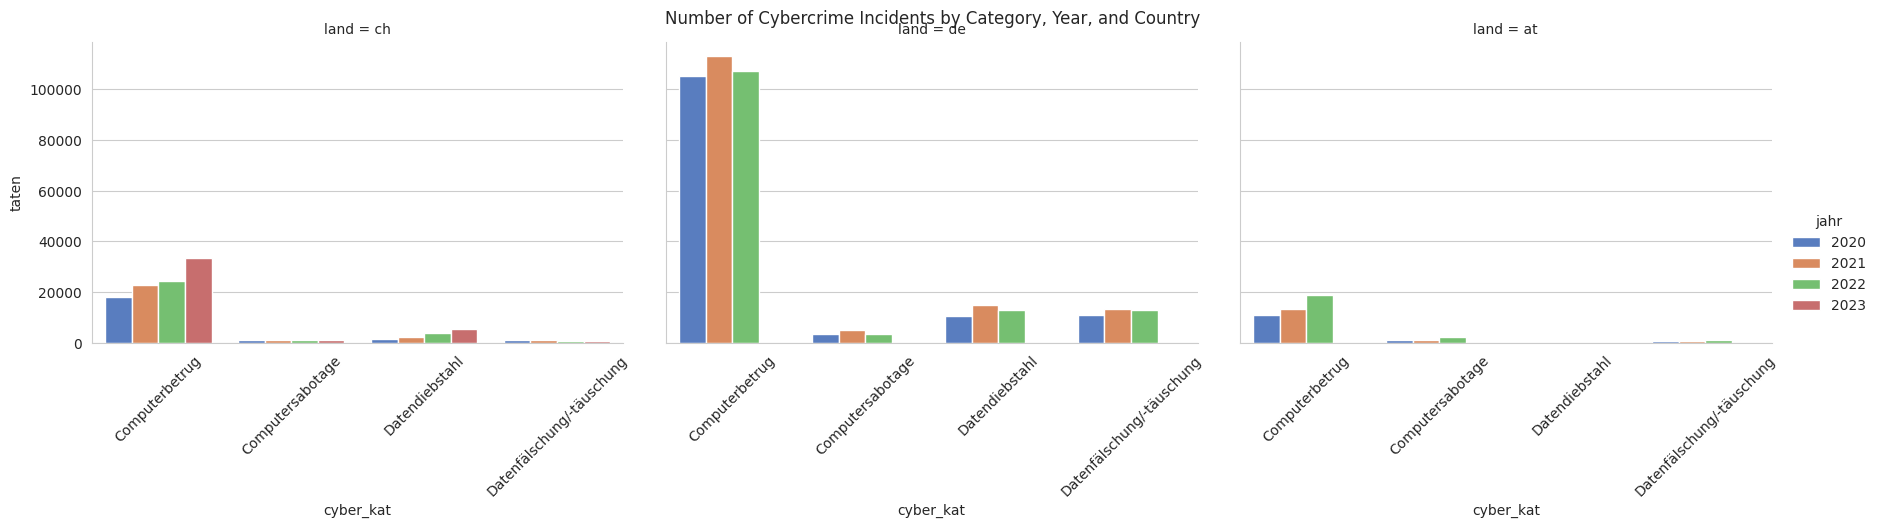

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Whitegrid als Anzeigemodus setzen
sns.set_style("whitegrid")

# Bar plot mit Seaborne erstellen
g = sns.catplot(
    data=master_cyber_dach,
    kind="bar",
    x="cyber_kat",
    y="taten",
    hue="jahr",
    col="land",
    height=4,
    aspect=1.5,
    palette="muted",
    legend=True
)

# x-Labels für bessere Lesbarkeit rotieren
g.set_xticklabels(rotation=45)

# itel und Sublots erstellen
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Number of Cybercrime Incidents by Category, Year, and Country')

# Plot anzeigen
plt.show()

# Grundanalyse

Wie hat sich die Cyberkriminalität in den Jahren 2020 bis 2022 in der DACH-Region entwickelt?

# Stacked Area Chart pro Land inkl. Kategorie

## CH

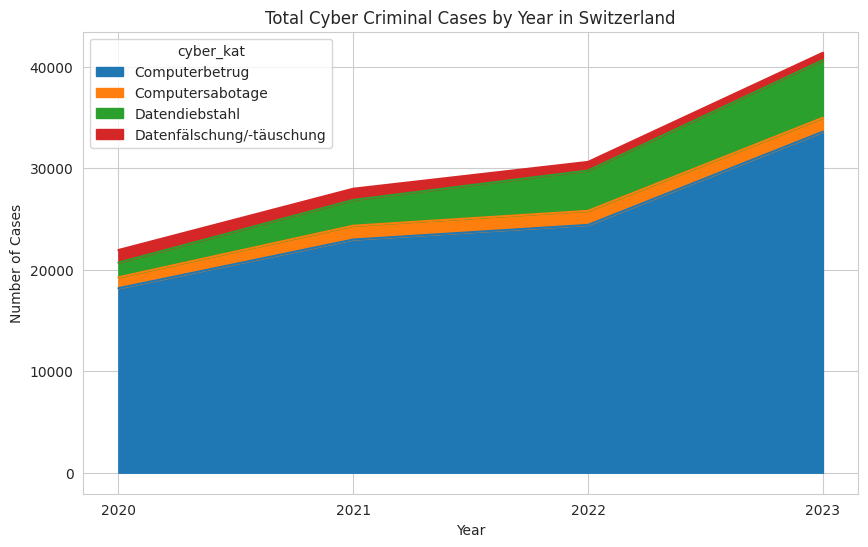

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Filtern auf ch (Schweiz)
data_ch = data[data['land'] == 'ch']

# Daten pivottieren, um Cyberdelikte als Spalten und Jahre als Zeilen zu erhalten
pivot_data = data_ch.pivot_table(index='jahr', columns='cyber_kat', values='taten', aggfunc=np.sum)

# Stacked area chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='area', stacked=True, ax=ax)
plt.title('Total Cyber Criminal Cases by Year in Switzerland')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.xticks(pivot_data.index.unique())  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.show()

## DE

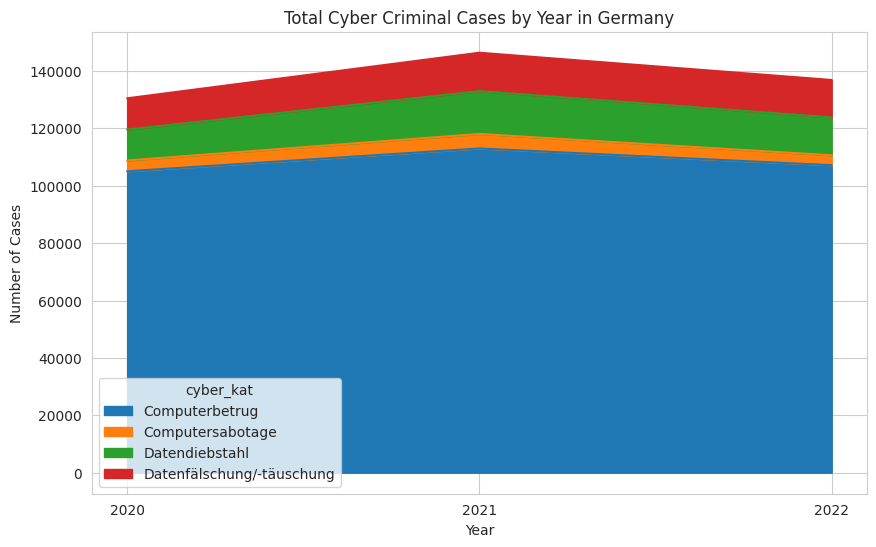

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Filtern auf de (Deutschland)
data_de = data[data['land'] == 'de']

# Daten pivottieren, um Cyberdelikte als Spalten und Jahre als Zeilen zu erhalten
pivot_data = data_de.pivot_table(index='jahr', columns='cyber_kat', values='taten', aggfunc=np.sum)

# Stacked area chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='area', stacked=True, ax=ax)
plt.title('Total Cyber Criminal Cases by Year in Germany')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.xticks(pivot_data.index.unique())  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.show()

## AT

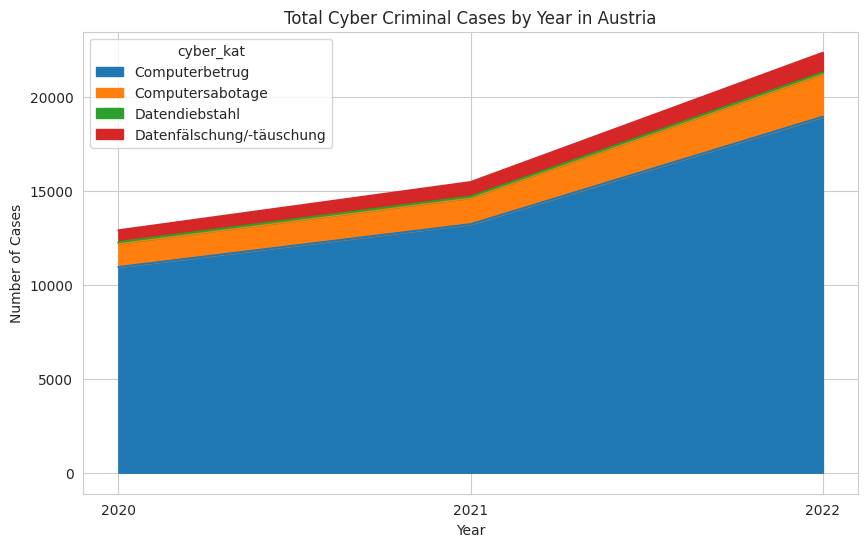

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Filtern auf at (Österreich)
data_at = data[data['land'] == 'at']

# Daten pivottieren, um Cyberdelikte als Spalten und Jahre als Zeilen zu erhalten
pivot_data = data_at.pivot_table(index='jahr', columns='cyber_kat', values='taten', aggfunc=np.sum)

# Stacked area chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data.plot(kind='area', stacked=True, ax=ax)
plt.title('Total Cyber Criminal Cases by Year in Austria')
plt.ylabel('Number of Cases')
plt.xlabel('Year')
plt.xticks(pivot_data.index.unique())  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.show()

# Line Chart alle Länder ohne Kategorien

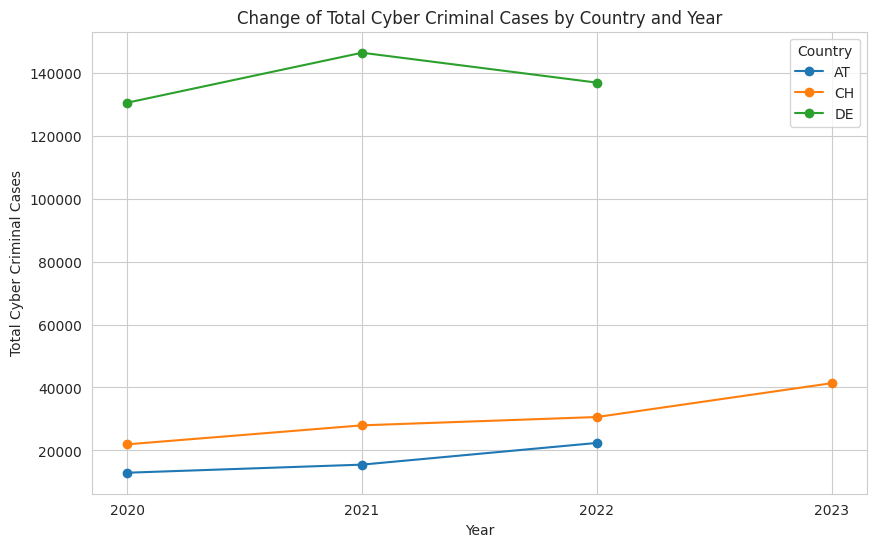

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
url = 'https://raw.githubusercontent.com/baumannf/bina_module/main/data/master/Cyberdelikte_DACH.csv'
data = pd.read_csv(url)

# Daten pro Land und Jahr gruppieren und Fälle summieren
grouped_data = data.groupby(['land', 'jahr'])['taten'].sum().unstack(fill_value=0)

# Line chart plotten
fig, ax = plt.subplots(figsize=(10, 6))
for country in grouped_data.index:
    x_vals = grouped_data.columns
    y_vals = grouped_data.loc[country]
    # Nuller-Jahre ausfiltern für Länder ohne Daten, damit kein Datenpunkt erscheint für Länder ohne Werte
    filtered_x = [x for x, y in zip(x_vals, y_vals) if y > 0]
    filtered_y = [y for y in y_vals if y > 0]
    ax.plot(filtered_x, filtered_y, marker='o', label=f'{country.upper()}')

plt.title('Change of Total Cyber Criminal Cases by Country and Year')
plt.xlabel('Year')
plt.ylabel('Total Cyber Criminal Cases')
plt.xticks(grouped_data.columns)  # Fix des Problems, dass Jahre mehrmals auf der x-Achse vorkamen
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Balkendiagramm zum Vergleich der Kategorien pro Land

In [33]:
## Ich kriegs nicht hin. Vielleicht jemand anderes? Gruss Skender

## Vergleich gemeldete Taten und aufgeklärte Taten

In [34]:
## Offen